# Decision Tree Classifier

Decision Tree Classifier is a tree-structured classifier, where internal nodes represent the features of a dataset,
branches represent the decision rules and each leaf node represents the outcome. 
In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node.

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

In [2]:
#import dataset
df = pd.read_csv("C:\\Users\\sowjanya\\Desktop\\codingrade\\car_evaluation.csv")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
df.shape #total rows and columns

(1727, 7)

In [4]:
df.head() #1st 5 rows and columns

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
# Rename column names
col_names = ['buying_price', 'maint_cost', 'doors', 'person_capacity', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying_price',
 'maint_cost',
 'doors',
 'person_capacity',
 'lug_boot',
 'safety',
 'class']

In [6]:
df.head()

,buying_price,maint_cost,doors,person_capacity,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
#View information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   buying_price     1727 non-null   object
 1   maint_cost       1727 non-null   object
 2   doors            1727 non-null   object
 3   person_capacity  1727 non-null   object
 4   lug_boot         1727 non-null   object
 5   safety           1727 non-null   object
 6   class            1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
#frequency distribution of values in variables
#frequency counts of categorical variables

col_names = ['buying_price', 'maint_cost', 'doors', 'person_capacity', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())   

high     432
med      432
low      432
vhigh    431
Name: buying_price, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint_cost, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: person_capacity, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [9]:
df.columns

Index(['buying_price', 'maint_cost', 'doors', 'person_capacity', 'lug_boot',
       'safety', 'class'],
      dtype='object')

Summary of variables:
There are 7 variables in the dataset. All the variables are of categorical data type.
These are given by buying, maint, doors, persons, lug_boot, safety and class.
'class' is the target variable.

In [10]:
# check missing values in variables
df.isnull().sum() #Here result is no missing values in the dataset

buying_price       0
maint_cost         0
doors              0
person_capacity    0
lug_boot           0
safety             0
class              0
dtype: int64

In [11]:
#Explore class variable
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

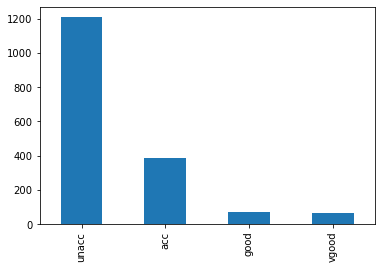

In [12]:
#plotting the class variable
df['class'].value_counts().plot(kind='bar')
plt.show()

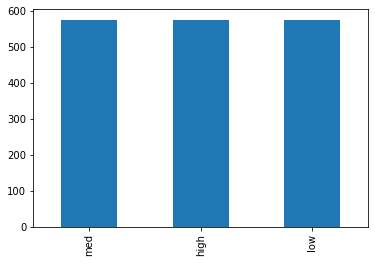

In [13]:
#distribution of independent variables
df['safety'].value_counts().plot(kind='bar')
plt.show()

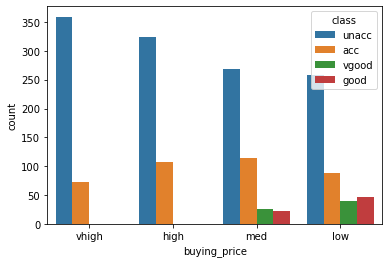

In [14]:
#count plot
sns.countplot(df['buying_price'],hue=df['class'])
plt.show()

In [15]:
#check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   buying_price     1727 non-null   object
 1   maint_cost       1727 non-null   object
 2   doors            1727 non-null   object
 3   person_capacity  1727 non-null   object
 4   lug_boot         1727 non-null   object
 5   safety           1727 non-null   object
 6   class            1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [16]:
#Data preprocessing
#dependent and independent variables
X=df.drop(['class'],axis=1)
y=df['class']

In [17]:
#ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
buying_price_category = ['low', 'med', 'high', 'vhigh']
maint_cost_category = ['low', 'med', 'high', 'vhigh']
doors_category = ['2', '3', '4', '5more']
person_capacity_category = ['2', '4', 'more']
lug_boot_category = ['small', 'med', 'big']
safety_category = ['low', 'med', 'high']
all_categories = [buying_price_category, maint_cost_category,doors_category,person_capacity_category,lug_boot_category,safety_category]
oe = OrdinalEncoder(categories= all_categories)
X = oe.fit_transform( df[['buying_price', 'maint_cost', 'doors', 'person_capacity', 'lug_boot', 'safety']])

In [18]:
# train test data splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [19]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1208, 6), (519, 6))

In [20]:
#Model development

DT_classifier=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=10)
DT_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [21]:
#predict test data
y_pred = DT_classifier.predict(X_test)


In [22]:
#we use confusion matrix for finding the preformance of the model
confusion_matrix(y_test,y_pred)

array([[ 62,   0,  59,   0],
       [ 20,   0,   0,   0],
       [ 15,   0, 342,   0],
       [ 21,   0,   0,   0]], dtype=int64)

In [23]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.53      0.51      0.52       121
        good       0.00      0.00      0.00        20
       unacc       0.85      0.96      0.90       357
       vgood       0.00      0.00      0.00        21

    accuracy                           0.78       519
   macro avg       0.34      0.37      0.36       519
weighted avg       0.71      0.78      0.74       519



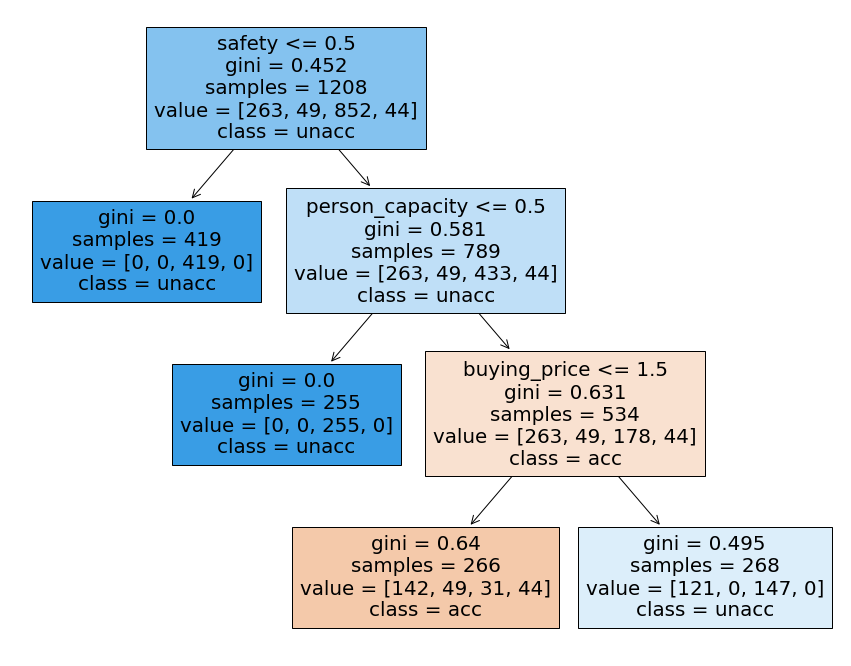

In [24]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
_ = tree.plot_tree(DT_classifier,
feature_names=df.columns[:-1],
class_names= DT_classifier.classes_, filled=True)